In [49]:
%matplotlib inline

In [72]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from pandas import Series, DataFrame
from datetime import datetime

In [73]:
#1(a)
#importing data
chicago = pd.read_csv('chicago.csv', sep = ',', usecols = ['DATE', 'TMAX', 'TMIN'], parse_dates = ['DATE'])
dc = pd.read_csv('dc.csv', sep = ',', usecols = ['DATE', 'TMAX', 'TMIN'], parse_dates = ['DATE'])
indiana = pd.read_csv('indianapolis.csv', sep = ',', usecols = ['DATE', 'TMAX', 'TMIN'], parse_dates = ['DATE'])
pittsburgh = pd.read_csv('pittsburgh.csv', sep = ',', usecols = ['DATE', 'TMAX', 'TMIN'], parse_dates = ['DATE'])
miami = pd.read_csv('miami.csv', sep = ',', usecols = ['DATE', 'TMAX', 'TMIN'], parse_dates = ['DATE'])

#merging miami, indiana, pittsburgh, washington into one dataframe
merged = dc.append(indiana)
merged = merged.append(pittsburgh)
merged = merged.append(miami)

In [74]:
# remove missing values 
chicago = chicago[chicago['TMAX']>-9998]
chicago = chicago[chicago['TMIN']>-9998]
merged = merged[merged['TMAX']>-9998]
merged = merged[merged['TMIN']>-9998]

# modifying dates into datetime format 
chicago['DATE'] = pd.to_datetime(chicago['DATE'])
merged['DATE'] = pd.to_datetime(merged['DATE'])
# create columns to make it easier to manipulate the data to get x-axis to be just one year
chicago['axis'] = chicago['DATE'].dt.dayofyear
chicago['year'] = chicago['DATE'].dt.year
chicago['monthday'] = chicago['DATE'].dt.month*100+chicago['DATE'].dt.day
merged['axis'] = merged['DATE'].dt.dayofyear
merged['year'] = merged['DATE'].dt.year
merged['monthday'] = merged['DATE'].dt.month*100+merged['DATE'].dt.day
chicago.describe()

,TMAX,TMIN,axis,year,monthday
count,38810.000000,38810.000000,38810.000000,38810.000000,38810.000000
mean,60.270137,42.159650,184.542644,2011.030121,672.672610
std,21.375435,19.524026,104.148141,3.006164,340.866661
min,-11.000000,-24.000000,1.000000,2006.000000,101.000000
25%,43.000000,28.000000,95.000000,2008.000000,405.000000
50%,63.000000,43.000000,187.000000,2011.000000,705.000000
75%,79.000000,59.000000,274.000000,2014.000000,930.000000
max,105.000000,84.000000,366.000000,2016.000000,1231.000000


In [75]:
# creating leap year list
i = 1976
leap_years = []
while i <= 2016: 
    i += 4 
    leap_years.append(i)

In [76]:
# creating non-leap year list 
non_leap = []
i = 1976
#left out 1975, because it is the first year to define merged_all 
#leave out 1976 manually because of the way leap_year is defined
for i in range(1976, 2017):
    if i not in leap_years:
        if i != 1976:
            non_leap.append(i)
            i += 1 

In [77]:
#create a dataframe of leapyears for chicago
chicago_leap = chicago[chicago['year']==1976]
for i in leap_years:
    chicago_leap = chicago_leap.append(chicago[chicago['year']==i])

#create a dataframe of leapyears for rest of the cities
merged_leap = merged[merged['year']==1976]
for i in leap_years:
    merged_leap = merged_leap.append(merged[merged['year']==i])

#create a dataframe of non-leapyears for rest of the cities
merged_all = merged[merged['year']==1975]    
for i in non_leap:
    merged_all = merged_all.append(merged[merged['year']==i])

#create a dataframe of non-leapyears for chicago
chicago_all = chicago[chicago['year']==1975]    
for i in non_leap:
    chicago_all = chicago_all.append(chicago[chicago['year']==i])

In [78]:
#making axis(plotting as x-axis) different for leap and non-leap years
i = 100
while i <= 919:
    i += 1
    chicago_all['axis'] = np.where(chicago_all['monthday']==i, chicago_all['axis'].add(365), chicago_all['axis'])
    chicago_leap['axis'] = np.where(chicago_leap['monthday']==i, chicago_leap['axis'].add(366), chicago_leap['axis'])
    merged_all['axis'] = np.where(merged_all['monthday']==i, merged_all['axis'].add(365), merged_all['axis'])
    merged_leap['axis'] = np.where(merged_leap['monthday']==i, merged_leap['axis'].add(366), merged_leap['axis'])  


In [79]:
# append leap years and non leap years back to the same dataset
merged = merged_all.append(merged_leap)
chicago = chicago_all.append(chicago_leap)
merged.describe()

,TMAX,TMIN,axis,year,monthday
count,79984.000000,79984.000000,79984.000000,79984.000000,79984.000000
mean,65.467143,45.423922,447.250313,1993.192826,665.326690
std,19.520783,18.928088,105.080174,10.727862,343.216811
min,-11.000000,-22.000000,264.000000,1975.000000,101.000000
25%,50.000000,31.000000,356.000000,1980.000000,402.000000
50%,69.000000,46.000000,448.000000,1998.000000,630.000000
75%,82.000000,61.000000,538.000000,2002.000000,930.000000
max,104.000000,96.000000,630.000000,2006.000000,1231.000000


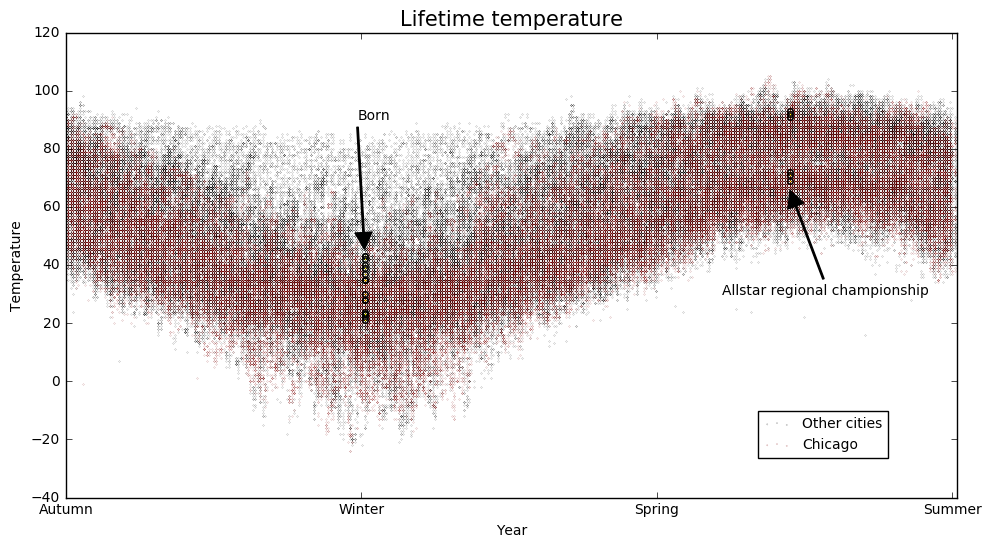

In [80]:
#1(b)
#creating plotting x and y variables 
merged_min = merged['TMIN']
merged_max = merged['TMAX']
merged_all = merged['TMIN'].append(merged['TMAX'])
chicago_max = chicago['TMAX']
chicago_min = chicago['TMAX']
chicago_all = chicago['TMIN'].append(chicago['TMAX'])
chicagod = chicago['axis'].append(chicago['axis'])
mergedd = merged['axis'].append(merged['axis'])
#plotting graph 
width = 11.5
height = 6
ax, fig = plt.subplots(figsize=(width,height))
#1(c)
#plotting rest of the cities with black markers
plt.scatter(mergedd, merged_all, color='black', label='Other cities', s=0.01)
#1(d)
#plotting chicago data with maroon marker
plt.scatter(chicagod, chicago_all, color='maroon', label='Chicago', s= 0.01)
plt.xlim(264,631)

#setting dates 

#1(f) labelling graph 
plt.title('Lifetime temperature', fontsize=15)
plt.xlabel(r'Year')
plt.ylabel(r'Temperature')
plt.legend(bbox_to_anchor=(0.93, 0.2), loc='upper right', prop={'size':10}, ncol=1)

#creating markers for x-axis labels 
my_xticks = ['Autumn','Winter','Spring','Summer']
x = np.linspace(264,629,4)
plt.xticks(x, my_xticks)


#1(e)
#color born in yellow 
born = merged[merged['DATE']=='1975-01-22']
born_max = born['TMAX']
born_min = born['TMIN']
born_all = born_max.append(born_min)
bornd = born['axis'].append(born['axis'])
plt.scatter(bornd, born_all, color='yellow', label='Born', s=1, lw=4, edgecolor='black')

#color little league all-stars team championship 
allstar = merged[merged['DATE']=='1988-07-14']
allstar_max = allstar['TMAX']
allstar_min = allstar['TMIN']
allstar_all = allstar_max.append(allstar_min)
allstard = allstar['axis'].append(allstar['axis'])
plt.scatter(allstard, allstar_all, color='yellow', label='allstar', s=1, lw=4, edgecolor='black')

#creating labels 
plt.annotate('Born', xy=(387, 45), xytext=(384, 90),
            arrowprops=dict(facecolor='black', shrink=0.01, width=1)
            )
plt.annotate('Allstar regional championship', xy=(562, 66), xytext=(534, 30),
            arrowprops=dict(facecolor='black', shrink=0.01, width=1)
            )

In [85]:
merged[merged['monthday']==920].describe()

,TMAX,TMIN,axis,year,monthday
count,218.000000,218.000000,218.000000,218.000000,218.0
mean,79.220183,58.105505,628.513761,1993.325688,920.0
std,7.535914,9.589398,0.875837,10.528407,0.0
min,61.000000,37.000000,628.000000,1975.000000,920.0
25%,73.000000,51.000000,628.000000,1982.000000,920.0
50%,80.000000,58.000000,628.000000,1998.000000,920.0
75%,85.000000,64.000000,630.000000,2002.000000,920.0
max,96.000000,83.000000,630.000000,2005.000000,920.0


In [88]:
merged.groupby('year').count()

,DATE,TMAX,TMIN,axis,monthday
year,,,,,
1975,3454,3454,3454,3454,3454
1976,3900,3900,3900,3900,3900
1977,3597,3597,3597,3597,3597
1978,3536,3536,3536,3536,3536
1979,3541,3541,3541,3541,3541
1980,2392,2392,2392,2392,2392
1981,729,729,729,729,729
1982,727,727,727,727,727
1983,698,698,698,698,698


In [97]:
merged.describe()

,TMAX,TMIN,axis,year,monthday
count,79984.000000,79984.000000,79984.000000,79984.000000,79984.000000
mean,65.467143,45.423922,447.250313,1993.192826,665.326690
std,19.520783,18.928088,105.080174,10.727862,343.216811
min,-11.000000,-22.000000,264.000000,1975.000000,101.000000
25%,50.000000,31.000000,356.000000,1980.000000,402.000000
50%,69.000000,46.000000,448.000000,1998.000000,630.000000
75%,82.000000,61.000000,538.000000,2002.000000,930.000000
max,104.000000,96.000000,630.000000,2006.000000,1231.000000
